# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\Akarsh Somani\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

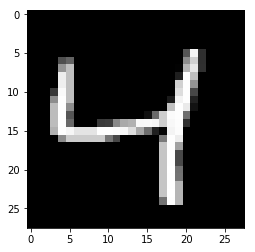

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6921
Epoch: 1/20... Training loss: 0.6886
Epoch: 1/20... Training loss: 0.6851
Epoch: 1/20... Training loss: 0.6803
Epoch: 1/20... Training loss: 0.6745
Epoch: 1/20... Training loss: 0.6675
Epoch: 1/20... Training loss: 0.6600
Epoch: 1/20... Training loss: 0.6497
Epoch: 1/20... Training loss: 0.6396
Epoch: 1/20... Training loss: 0.6273
Epoch: 1/20... Training loss: 0.6149
Epoch: 1/20... Training loss: 0.5983
Epoch: 1/20... Training loss: 0.5839
Epoch: 1/20... Training loss: 0.5665
Epoch: 1/20... Training loss: 0.5500
Epoch: 1/20... Training loss: 0.5281
Epoch: 1/20... Training loss: 0.5133
Epoch: 1/20... Training loss: 0.4941
Epoch: 1/20... Training loss: 0.4758
Epoch: 1/20... Training loss: 0.4610
Epoch: 1/20... Training loss: 0.4436
Epoch: 1/20... Training loss: 0.4234
Epoch: 1/20... Training loss: 0.4162
Epoch: 1/20... Training loss: 0.3980
Epoch: 1/20... Training loss: 0.3889
Epoch: 1/20... Training loss: 0.3765
Epoch: 1/20... Training loss: 0.3657
E

Epoch: 1/20... Training loss: 0.1949
Epoch: 1/20... Training loss: 0.1991
Epoch: 1/20... Training loss: 0.2005
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.2014
Epoch: 1/20... Training loss: 0.1972
Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.2018
Epoch: 1/20... Training loss: 0.1956
Epoch: 1/20... Training loss: 0.1963
Epoch: 1/20... Training loss: 0.1926
Epoch: 1/20... Training loss: 0.1963
Epoch: 1/20... Training loss: 0.1993
Epoch: 1/20... Training loss: 0.1946
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1997
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1964
Epoch: 1/20... Training loss: 0.1949
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1919
E

Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1601
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1504
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1482
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1578
E

Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1302
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1289
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1300
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1339
E

Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1248
E

Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1175
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1178
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1204
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1197
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1138
E

Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1094
E

Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.0976
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1061
E

Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1020
E

Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.1033
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0937
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0988
E

Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.1009
Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.1021
Epoch: 9/20... Training loss: 0.0943
E

Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.1009
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.1000
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0917
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0894
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0902
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20... Training loss: 0.0994
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0977
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0982
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0892
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0983
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0987
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0984
Epoch: 18/20... Training loss: 0.0975
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0987
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0975
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0876
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0890
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

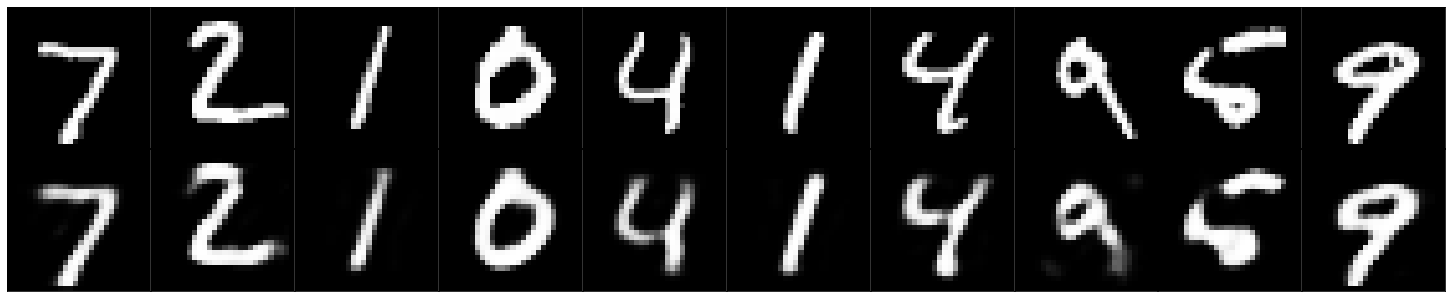

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.